# Pandas

## Część I

Będziemy przetwarzać dane z Kaggle odnośnie imion dzieci w USA.

Krok 0: wczytaj pandas

In [61]:
import pandas as pd

Krok 1: wczytaj dane z pliku `US_Baby_Names_right.csv` z katalogu `lab12_files`

In [62]:
baby_names = pd.read_csv('lab12_files/US_Baby_Names_right.csv')

Krok 2: przypisz dane do zmiennej `baby_names`. Zobacz jakiego typu dane są przechowywane i ile jest rekordów

In [63]:
print(type(baby_names))
print(len(baby_names))

<class 'pandas.core.frame.DataFrame'>
1016395


Krok 3: podejrzy pierwszych 10 rekordów ze zbioru

In [64]:
baby_names[:10]

,Unnamed: 0,Id,Name,Year,Gender,State,Count
0,11349,11350,Emma,2004,F,AK,62
1,11350,11351,Madison,2004,F,AK,48
2,11351,11352,Hannah,2004,F,AK,46
3,11352,11353,Grace,2004,F,AK,44
4,11353,11354,Emily,2004,F,AK,41
5,11354,11355,Abigail,2004,F,AK,37
6,11355,11356,Olivia,2004,F,AK,33
7,11356,11357,Isabella,2004,F,AK,30
8,11357,11358,Alyssa,2004,F,AK,29
9,11358,11359,Sophia,2004,F,AK,28


Krok 4: usuń kolumny 'Unnamed: 0' oraz 'Id' 

In [65]:
baby_names.drop(columns=["Unnamed: 0","Id"], axis=1)

,Name,Year,Gender,State,Count
0,Emma,2004,F,AK,62
1,Madison,2004,F,AK,48
2,Hannah,2004,F,AK,46
3,Grace,2004,F,AK,44
4,Emily,2004,F,AK,41
...,...,...,...,...,...
1016390,Seth,2014,M,WY,5
1016391,Spencer,2014,M,WY,5
1016392,Tyce,2014,M,WY,5
1016393,Victor,2014,M,WY,5


Krok 5: czy w zbiorze jest więcej imion kobiet, czy mężczyzn?

In [66]:
a= baby_names[baby_names.Gender=="M"].count()["Gender"]
b= baby_names[baby_names.Gender=="F"].count()["Gender"]
print("M ",a,"F",b,sep=" " )

M  457549 F 558846


Krok 6: zgrupuj wiersze względem imion i wypisz 10 najczęściej pojawiających się imion.

In [67]:
baby_names['Name'].value_counts()[:10]

Riley     1112
Avery     1080
Jordan    1073
Peyton    1064
Hayden    1049
Taylor    1033
Jayden    1031
Alexis     984
Payton     971
Dakota     962
Name: Name, dtype: int64

Krok 7: wyniki z Kroku 6 zaprezentuj na wykresie korzystając z `matplotlib`. Przygotuj trzy wykresy, tj. 10 najczęsciej występujących imion: ogółem, u mężczyzn i u kobiet.

<BarContainer object of 10 artists>

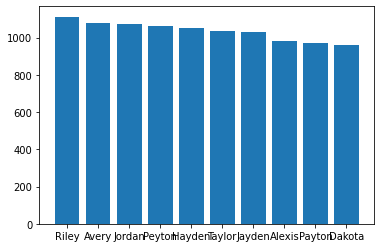

In [68]:
import matplotlib.pyplot as plt
dfx = baby_names['Name'].value_counts()[:10].index.tolist()
dfy = baby_names['Name'].value_counts()[:10]                            
plt.bar(dfx,dfy)

<BarContainer object of 10 artists>

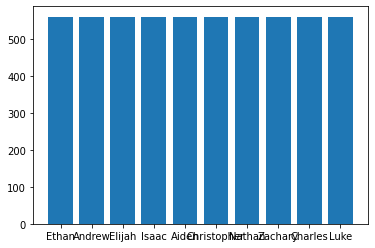

In [69]:
import matplotlib.pyplot as plt
dfx = baby_names[baby_names["Gender"]=='M']['Name'].value_counts()[:10].index.tolist()
dfy = baby_names[baby_names["Gender"]=='M']['Name'].value_counts()[:10]
plt.bar(dfx,dfy)   


<BarContainer object of 10 artists>

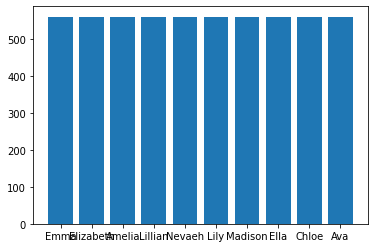

In [70]:
dfx = baby_names[baby_names["Gender"]=='F']['Name'].value_counts()[:10].index.tolist()
dfy = baby_names[baby_names["Gender"]=='F']['Name'].value_counts()[:10]                            
plt.bar(dfx,dfy)

Krok 8: Jak wiele różnych imion występuje w zbiorze?

In [71]:
print(len(set(baby_names['Name'])))

17632


Krok 9: Przygotuj generator imion, losujący je zgodnie z rozkłądem prawdopodobieństwa otrzymanym na podstawie przetwarzanego pliku

In [72]:
prob = baby_names['Name'].value_counts()
print(prob.sample(weights = prob))

Kinzie    31
Name: Name, dtype: int64


Krok 10: 
- Jakie imie występuje najczęściej?
- Wyznacz średnią, medianę i odchylenie stanadrdowe wystepowania imion.

In [73]:
print(baby_names['Name'].value_counts().index[0])
print(baby_names['Name'].value_counts().median)
print(baby_names['Name'].value_counts().mean)
print(baby_names['Name'].value_counts().std)

Riley
<bound method NDFrame._add_numeric_operations.<locals>.median of Riley      1112
Avery      1080
Jordan     1073
Peyton     1064
Hayden     1049
           ... 
Terryn        1
Yanna         1
Zemirah       1
Emmilyn       1
Coalton       1
Name: Name, Length: 17632, dtype: int64>
<bound method NDFrame._add_numeric_operations.<locals>.mean of Riley      1112
Avery      1080
Jordan     1073
Peyton     1064
Hayden     1049
           ... 
Terryn        1
Yanna         1
Zemirah       1
Emmilyn       1
Coalton       1
Name: Name, Length: 17632, dtype: int64>
<bound method NDFrame._add_numeric_operations.<locals>.std of Riley      1112
Avery      1080
Jordan     1073
Peyton     1064
Hayden     1049
           ... 
Terryn        1
Yanna         1
Zemirah       1
Emmilyn       1
Coalton       1
Name: Name, Length: 17632, dtype: int64>


## Część II

Krok 1: Wczytaj dane

In [74]:
occupation = pd.read_csv('lab12_files/ocupation.csv',sep='|')

Krok 2: Podejrzyj pierwsze 25 rekordów

In [75]:
occupation[:25]

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213
5,6,42,M,executive,98101
6,7,57,M,administrator,91344
7,8,36,M,administrator,05201
8,9,29,M,student,01002
9,10,53,M,lawyer,90703


Krok 3: Podejrzyj ostatnie 10 rekordów

In [76]:
occupation.tail(10)

,user_id,age,gender,occupation,zip_code
933,934,61,M,engineer,22902
934,935,42,M,doctor,66221
935,936,24,M,other,32789
936,937,48,M,educator,98072
937,938,38,F,technician,55038
938,939,26,F,student,33319
939,940,32,M,administrator,02215
940,941,20,M,student,97229
941,942,48,F,librarian,78209
942,943,22,M,student,77841


Krok 4: Ile jest obserwacji w zbiorze? Ile jest kolumn w zbiorze?

In [77]:
print(occupation['age'].count())
print(len(occupation.columns))

943
5


Krok 5: Wypisz nazwy kolumn

In [78]:
print((occupation.columns))

Index(['user_id', 'age', 'gender', 'occupation', 'zip_code'], dtype='object')


Krok 6: Ile różnych zawodów jest w zbiorze?

In [79]:
(occupation["occupation"].unique())

array(['technician', 'other', 'writer', 'executive', 'administrator',
       'student', 'lawyer', 'educator', 'scientist', 'entertainment',
       'programmer', 'librarian', 'homemaker', 'artist', 'engineer',
       'marketing', 'none', 'healthcare', 'retired', 'salesman', 'doctor'],
      dtype=object)

Krok 7: Przygotuj efektywny wykres na którym przedstawisz procetowy udział poszczególnych zawodów w zbiorze na charplocie
Wykorzystaj https://matplotlib.org/examples/pie_and_polar_charts/pie_demo_features.html

Przygotuj dwa wykresy: 
- jeden z wszystkimi zawodami
- drugi z 10 najcześtrzymi zawodami, pozostałem zawody trafiają do kategorii `Inne`

<AxesSubplot:ylabel='occupation'>

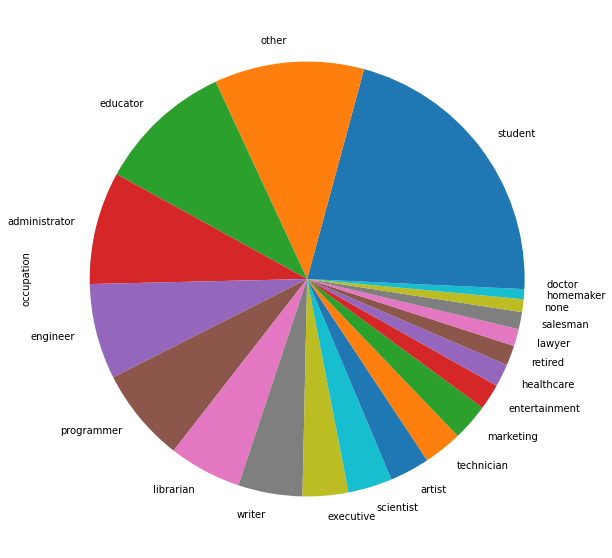

In [80]:
jobs= occupation['occupation'].value_counts().sort_values(ascending=False)
jobs.plot(kind='pie',figsize=(10,10))

student          196
other            105
educator          95
administrator     79
engineer          67
programmer        66
librarian         51
writer            45
executive         32
scientist         31
others           176
Name: occupation, dtype: int64


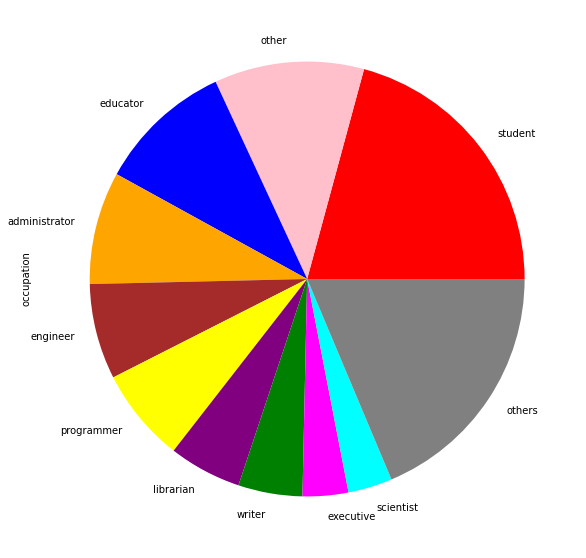

In [135]:
top_jobs= jobs[:10]
top_jobs['others']=jobs[10:].sum()

top_jobs.plot(kind='pie',figsize=(10,10), colors = ['red', 'pink', 'blue','orange','brown','yellow','purple','green','magenta','cyan','grey'] )
print(top_jobs)

Krok 8: Przygotuj efektywny wykres na którym przedstawisz 10 najczęstrzych zawodów oraz ile pracuje w nich kobiet a ilu meżczyzn
Wykorzystaj https://matplotlib.org/gallery/api/barchart.html#sphx-glr-gallery-api-barchart-py

student          136
other             69
educator          69
engineer          65
programmer        60
administrator     43
executive         29
scientist         28
technician        26
writer            26
Name: occupation, dtype: int64


<AxesSubplot:>

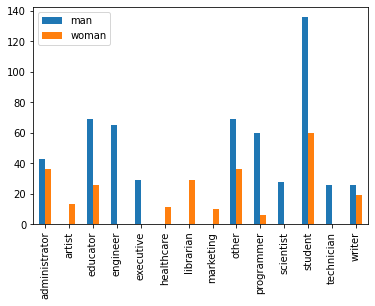

In [197]:
man = occupation[occupation['gender']=='M']['occupation'].value_counts().sort_values(ascending=False)[:10]
woman = occupation[occupation['gender']=='F']['occupation'].value_counts().sort_values(ascending=False)[:10]
plotdata = pd.DataFrame({
    'man': man,
    'woman': woman
})
plotdata.plot(kind="bar")

Krok 9: Przygotuj efektywny wykres na którym przedstawisz średni wiek pracowników danego zawodu

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]),
 [Text(0, 0, 'administrator'),
  Text(1, 0, 'artist'),
  Text(2, 0, 'doctor'),
  Text(3, 0, 'educator'),
  Text(4, 0, 'engineer'),
  Text(5, 0, 'entertainment'),
  Text(6, 0, 'executive'),
  Text(7, 0, 'healthcare'),
  Text(8, 0, 'homemaker'),
  Text(9, 0, 'lawyer'),
  Text(10, 0, 'librarian'),
  Text(11, 0, 'marketing'),
  Text(12, 0, 'none'),
  Text(13, 0, 'other'),
  Text(14, 0, 'programmer'),
  Text(15, 0, 'retired'),
  Text(16, 0, 'salesman'),
  Text(17, 0, 'scientist'),
  Text(18, 0, 'student'),
  Text(19, 0, 'technician'),
  Text(20, 0, 'writer')])

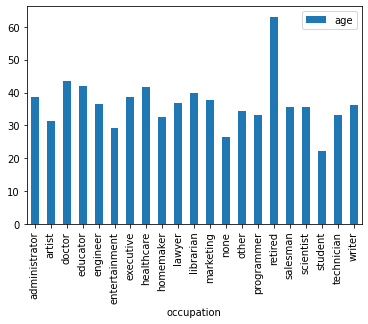

In [187]:
aaa= occupation.groupby(['occupation'], as_index=False).mean()
aaa.plot.bar(x='occupation', y='age',rot=0)
plt.xticks(rotation=90)

Krok 10: Przygotuj efektywny wykres na którym przedstawisz średni wiek kobiet i mężczyzn wykonujących dany zawód.

<AxesSubplot:xlabel='occupation'>

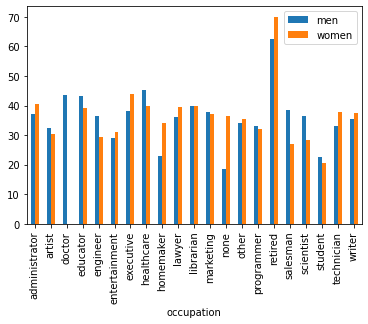

In [294]:
man = occupation[occupation['gender']=='M'].groupby(['occupation'], as_index=False).mean()[['occupation','age']]
woman = occupation[occupation['gender']=='F'].groupby(['occupation'], as_index=False).mean()[['occupation','age']]

result = []
for data in man['occupation']:
    if not (woman[woman['occupation']==data]).empty:
        result.append((woman[woman['occupation']==data].values[0])[1])
    else:
        result.append(0)

man.rename(columns={'age': 'men'}, inplace = True)
man['women']=result 

man.plot(kind='bar',x='occupation')